# Riskfolio-Lib Tutorial: 
<br>__[Original paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2708678)__
<br>__[Riskfolio documentation](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Brennan Bushee](https://www.linkedin.com/in/brennan-bushee-268273b8/)__
<br>
DISCLAIMER: The following is a demonstration only— it does not constitute financial advice. As a general rule, do not act on financial advice from strangers on the Internet.  The math is real, all opinions expressed are my own, and the financial data are outdated and possibly fake for all you know. For advice relevant to your particular situation, hire a (better) professional. 

## Performance Analysis of a Novel Clustering Method for Asset Allocation with a Real Portfolio

# 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import pyfolio as pf
import pypfopt

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2024-12-20'

# Tickers of assets
assets = ['APH', 'COST', 'FAST', 'GOOGL', 'LANC', 'LSTR', 'MIDD', 'MNST',
          'MU', 'ODFL', 'RACE', 'SSD', 'SPY', 'TXN', 'V', 'WAT', 'TTC'
         ]
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]

data.columns = assets

/Users/brennan/opt/anaconda3/envs/pyquant/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/brennan/opt/anaconda3/envs/pyquant/lib/python3.8/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
[*********************100%%**********************]  17 of 17 completed


In [2]:
# Calculating returns

Y = data.pct_change().dropna()

display(Y.head())

,APH,COST,FAST,GOOGL,LANC,LSTR,MIDD,MNST,MU,ODFL,RACE,SPY,SSD,TTC,TXN,V,WAT
Date,,,,,,,,,,,,,,,,,
2016-01-05,-1.1205%,0.2444%,-1.0948%,0.2752%,2.7908%,-0.4950%,1.4763%,1.1986%,3.4194%,0.8730%,2.3212%,0.1691%,1.4519%,0.5534%,-1.0489%,0.7530%,-0.4143%
2016-01-06,-2.3658%,-0.9254%,0.2767%,-0.2889%,-0.2586%,-1.1835%,-5.7172%,0.1575%,-4.0486%,-2.3927%,-2.9285%,-1.2614%,-0.7453%,-1.6923%,-0.6509%,-1.3111%,-0.0770%
2016-01-07,-3.6041%,-2.2909%,-2.0321%,-2.4140%,0.4062%,-1.5970%,-5.1302%,-0.7519%,-3.9381%,-3.8422%,-0.8923%,-2.3992%,-2.5233%,-2.3513%,-3.2198%,-1.9663%,-0.6861%
2016-01-08,-1.4998%,-1.7504%,-0.6402%,-1.3617%,-1.8935%,0.1764%,-2.2169%,-0.6543%,-2.4158%,-0.7412%,-7.5884%,-1.0976%,-0.9861%,-1.9206%,-2.5919%,-1.2332%,-1.6302%
2016-01-11,-0.7721%,1.7159%,0.2320%,0.2955%,0.0088%,0.1409%,-2.8393%,1.2409%,-6.0015%,-0.7286%,0.6263%,0.0989%,0.3112%,1.1690%,1.6878%,1.4270%,-0.5051%


In [3]:
## The problem, illustrated
split_date = '2022-01-04'
# Split the DataFrame

Y_before = Y.loc[:split_date]   # Includes rows up to the split date
Y_after = Y.loc[split_date:]   # Includes rows from the split date onward

# Optionally exclude the split_date in the second part
Y_after = Y.loc[split_date:]  # If you want to keep the split date in 'after'
#print("Before Split:")
#print(Y_before)

#print("\nAfter Split:")
#print(Y_after)
Y_before.pop("SPY")
benchmark_rets = Y_after.pop("SPY")
portfolio_returns = Y_after.sum(axis=1)

benchmark_rets, portfolio_returns

(Date
 2022-01-04   -0.0335%
 2022-01-05   -1.9202%
 2022-01-06   -0.0939%
 2022-01-07   -0.3953%
 2022-01-10   -0.1244%
                ...   
 2024-12-13   -0.0199%
 2024-12-16    0.4270%
 2024-12-17   -0.4120%
 2024-12-18   -2.9803%
 2024-12-19   -0.0307%
 Name: SPY, Length: 745, dtype: float64,
 Date
 2022-01-04    12.5277%
 2022-01-05   -30.3715%
 2022-01-06    -1.0464%
 2022-01-07   -26.7494%
 2022-01-10   -12.7599%
                 ...   
 2024-12-13    -1.3704%
 2024-12-16    -2.9325%
 2024-12-17   -14.7853%
 2024-12-18   -49.4783%
 2024-12-19   -22.6507%
 Length: 745, dtype: float64)

In [26]:
np.dot(w.weights, portfolio_returns)

0.32243609705982146

Date
2022-01-04   -0.0335%
2022-01-05    0.0006%
2022-01-06   -0.0000%
2022-01-07    0.0000%
2022-01-10   -0.0000%
               ...   
2024-12-13    0.0000%
2024-12-16    0.0000%
2024-12-17   -0.0000%
2024-12-18    0.0000%
2024-12-19   -0.0000%
Name: SPY, Length: 745, dtype: float64

## Wish list for an allocation strategy
- 3-5 year time horizon
- Don't lose more than ~50% in the worst case scenario
- The strategy should want to give some weight to each stock I have screened for, or I should be able to make that a constraint: I believe each of these stocks could make market-beating returns.
- It would ideally not require me to pass in expected future returns for each asset: if I had a reliable way to predict those, I wouldn't give it away for free in here.
- I am not willing to entrust my life savings to a "black box" algorithm. I want to be able to see its inner workings and see if they make sense qualitatively. I would especially not give free rein to a trading bot. 


## My risk metric: Conditional Drawdown at Risk (CDaR)


As we discussed previously, "drawdown" is the largest distance to a "valley" on the stock's price chart from the previous "peak", which is the most you could conceivably lose over a given time horizon. Conditional drawdown at risk is the weighted average of the worst 5% (typically) of scenarios. The risk contribution of each individual stock in this case is the weighted average of how much that particular stock goes down across that same set of scenarios.


In [13]:
# Building the portfolio object
import riskfolio as rp
port = rp.HCPortfolio(returns=Y_before)
port.codep
# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'abs_pearson' # Correlation matrix used to group assets in clusters
rm = 'CDaR' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'DBHT' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      obj="Sharpe",
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)



,APH,COST,FAST,GOOGL,LANC,LSTR,MIDD,MNST,MU,ODFL,RACE,SSD,TTC,TXN,V,WAT
weights,5.1061%,10.4567%,7.7494%,8.0719%,8.0449%,6.6381%,2.4907%,6.4265%,2.5869%,5.3873%,5.4217%,6.4100%,6.5903%,6.7467%,6.8178%,5.0549%


In [7]:
import matplotlib.pyplot as plt
hrp_dist = (1 - port.codep) ** 1/2
hrp_dist.style.background_gradient(subset='LSTR', cmap='YlGn')

,APH,COST,FAST,GOOGL,LANC,LSTR,MIDD,MNST,MU,ODFL,RACE,SSD,TTC,TXN,V,WAT
APH,0.000000,0.282536,0.227829,0.202968,0.315351,0.225311,0.238528,0.266209,0.212708,0.205168,0.243508,0.237673,0.202751,0.162922,0.169556,0.224795
COST,0.282536,0.000000,0.302131,0.277623,0.336507,0.320906,0.389427,0.303777,0.348602,0.303796,0.334366,0.349701,0.320201,0.265269,0.294939,0.320531
FAST,0.227829,0.302131,0.000000,0.287208,0.325039,0.229878,0.306401,0.319177,0.314255,0.236662,0.302836,0.283982,0.266274,0.248125,0.279188,0.304777
GOOGL,0.202968,0.277623,0.287208,0.000000,0.351763,0.307293,0.331283,0.268507,0.261595,0.279214,0.266847,0.316715,0.289746,0.199151,0.174633,0.270437
LANC,0.315351,0.336507,0.325039,0.351763,0.000000,0.315497,0.341648,0.328361,0.386518,0.360792,0.359616,0.301444,0.302816,0.333088,0.326701,0.353287
LSTR,0.225311,0.320906,0.229878,0.307293,0.315497,0.000000,0.300766,0.337415,0.312775,0.148470,0.309937,0.286438,0.243329,0.250908,0.273266,0.293580
MIDD,0.238528,0.389427,0.306401,0.331283,0.341648,0.300766,0.000000,0.324267,0.322236,0.305866,0.321115,0.257654,0.259975,0.314319,0.262141,0.310987
MNST,0.266209,0.303777,0.319177,0.268507,0.328361,0.337415,0.324267,0.000000,0.347119,0.328387,0.315635,0.337104,0.306511,0.284380,0.254393,0.320013
MU,0.212708,0.348602,0.314255,0.261595,0.386518,0.312775,0.322236,0.347119,0.000000,0.287847,0.294376,0.312927,0.295455,0.173348,0.244968,0.302272
ODFL,0.205168,0.303796,0.236662,0.279214,0.360792,0.148470,0.305866,0.328387,0.287847,0.000000,0.293704,0.289315,0.248973,0.247367,0.256948,0.298005


## How the Hierarchial Risk Parity (HRP) algorithm creates clusters

\begin{aligned} 
min \frac{1}{2}w^{T}\sigma w 
\end{aligned}
\begin{aligned} 
s.t. e^{T}w = 1; e = 1^{T} 
\end{aligned}


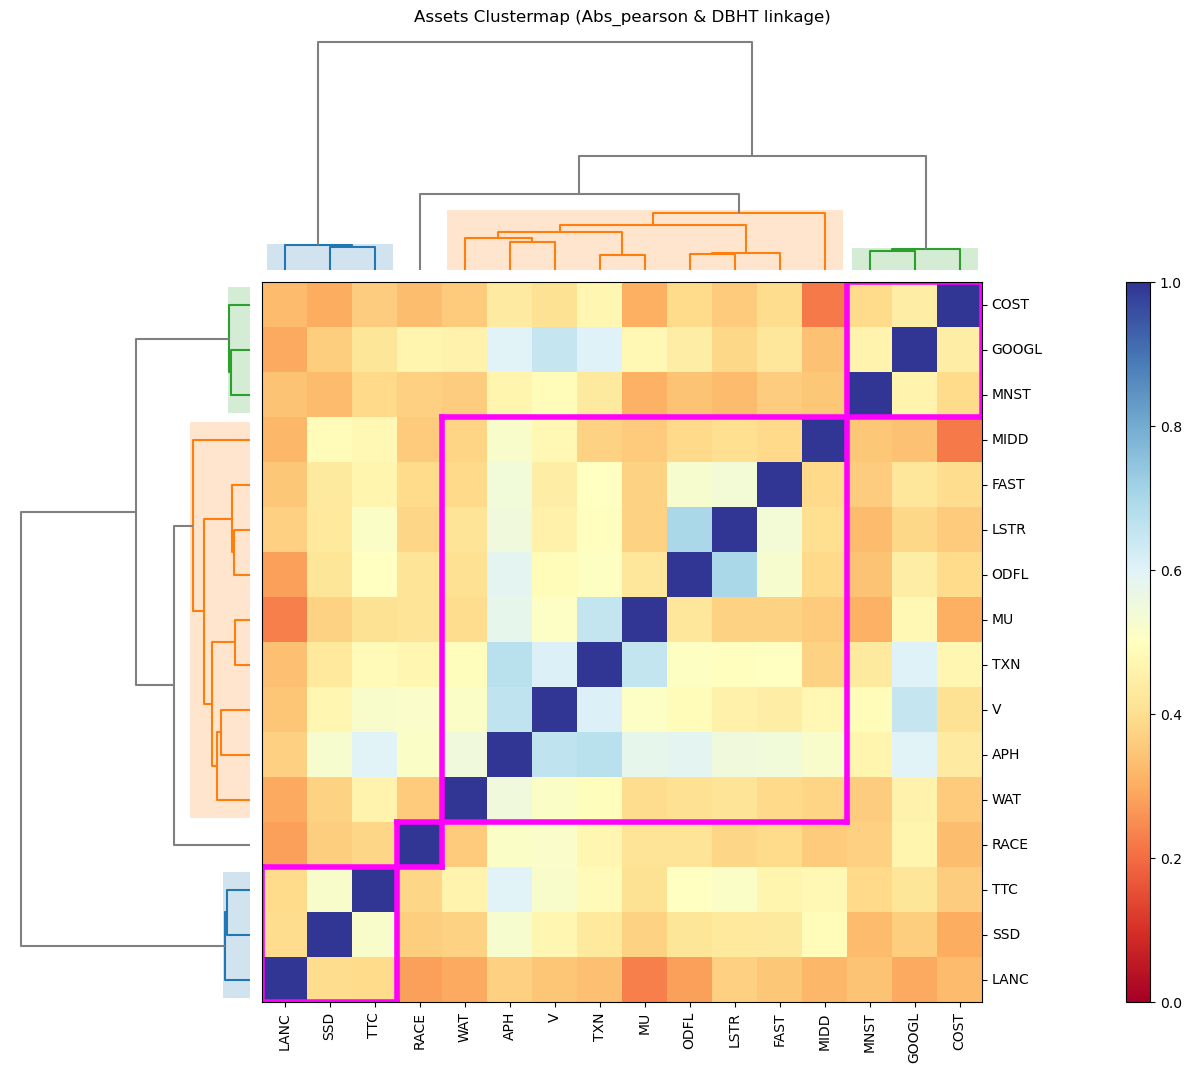

In [8]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y_before,
                        codependence='abs_pearson',
                        linkage='DBHT',
                        k=None,
                        max_k=10,
                        cmap='RdYlBu',
                        leaf_order=True,
                        ax=None)


UnboundLocalError: local variable 'b' referenced before assignment

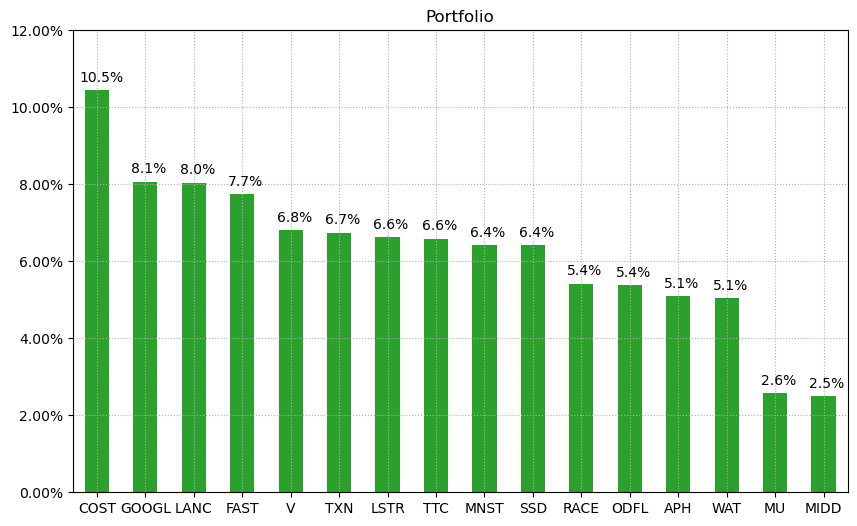

In [10]:
ax = rp.plot_bar(w,
                 title='Portfolio',
                 kind="v",
                 # others=0.05,
                 nrow=25,
                 height=6,
                 width=10,
                 ax=None)

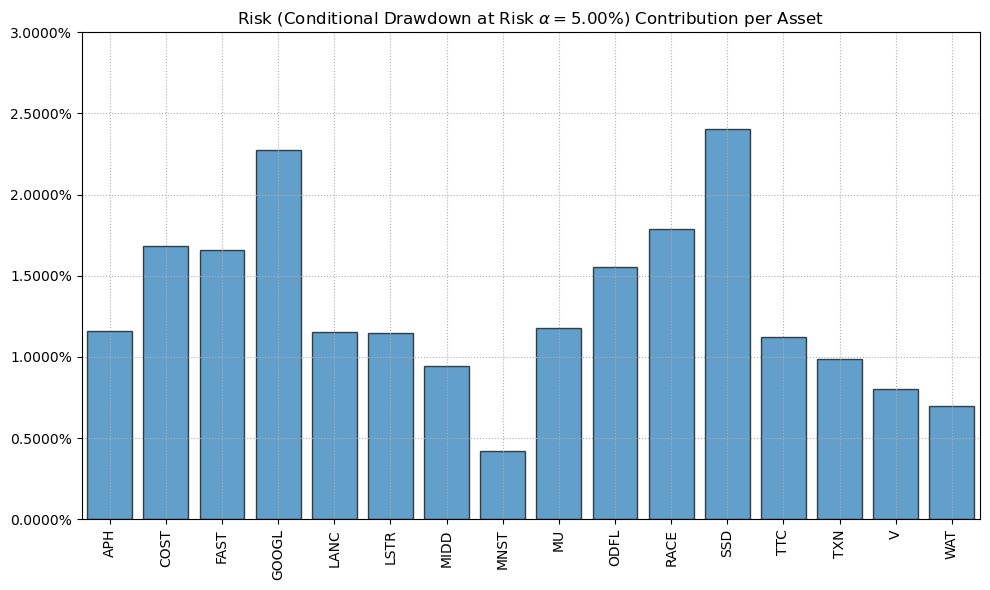

In [9]:
# Plotting the composition of the portfolio

# Plotting the risk contribution per asset

mu = Y_before.mean()
cov = Y_before.cov() # Covariance matrix
returns = Y_after # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

[]

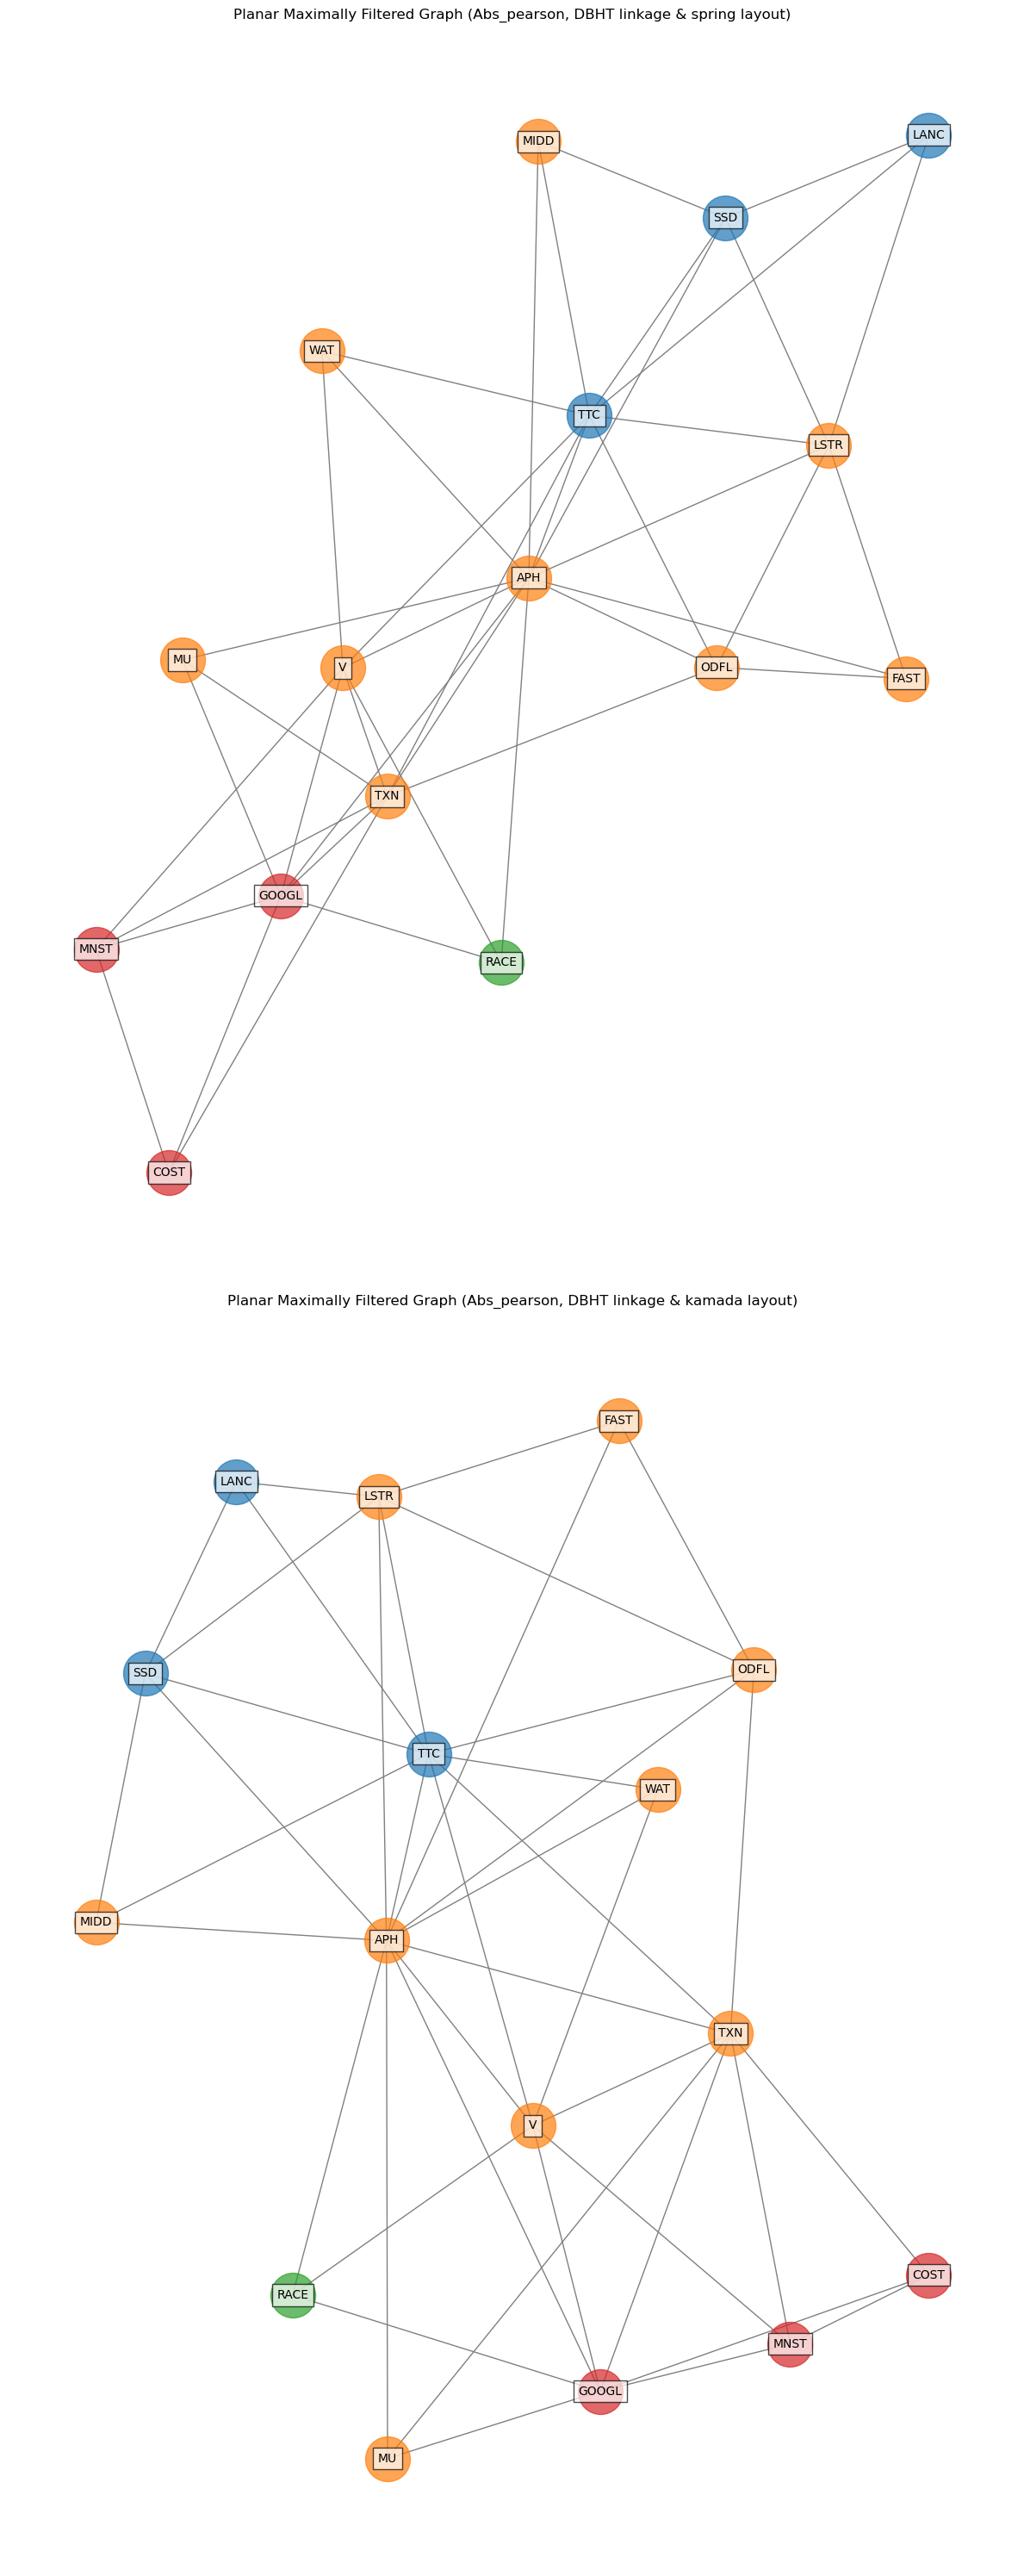

In [95]:
# Comparison of several network layouts
import matplotlib.pyplot as plt
kinds =['spring','kamada']

fig, ax = plt.subplots(len(kinds), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in kinds:
    ax[j] = rp.plot_network(returns=Y_before,
                            codependence="abs_pearson",
                            linkage="DBHT",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind=i,
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

## What risk factors are we exposed to that we are trying to manage?

## How does it perform out of sample? Does this make me a good portfolio manager?

The HRP portfolio seems a lot more robust: it even generates better returns out-of-sample with much less volatility across the board.

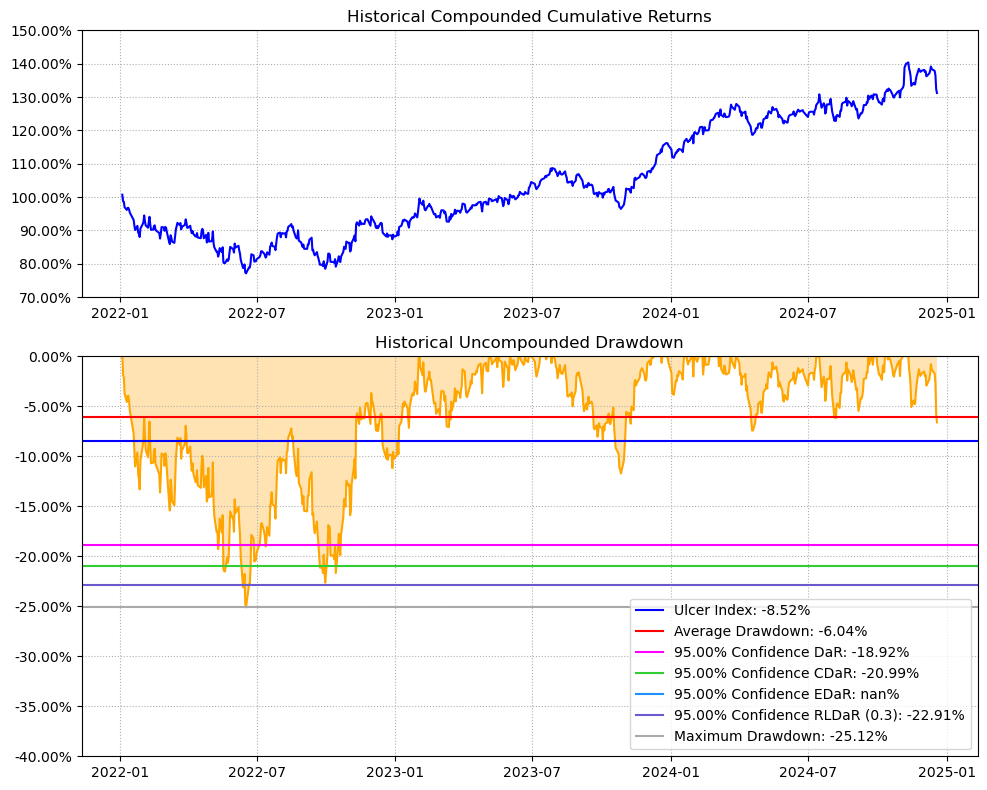

In [25]:
ax = rp.plot_drawdown(returns=Y_after,
                      w=w,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)


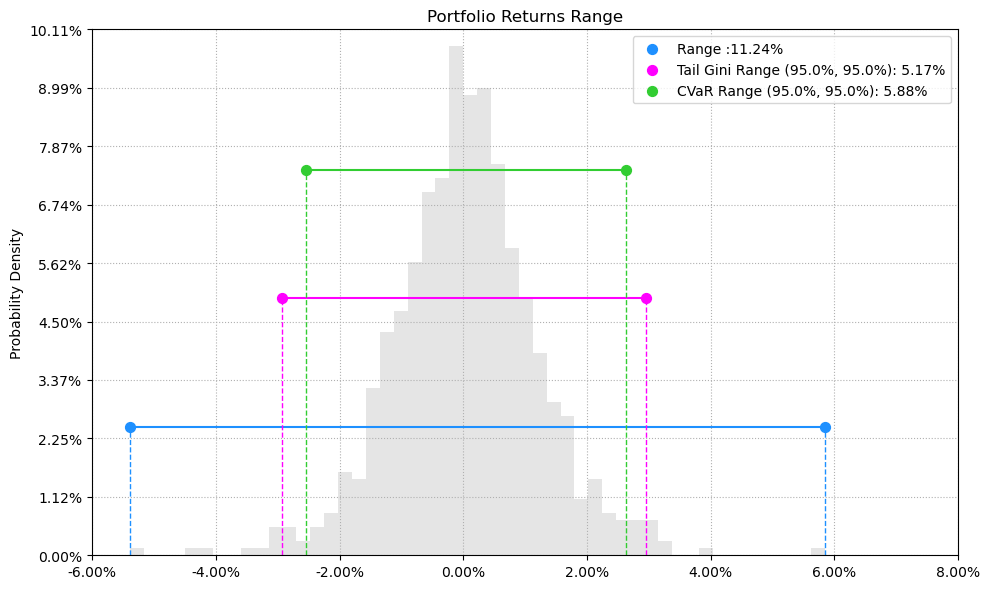

In [14]:
ax = rp.plot_range(returns=Y_after, w=w , alpha=0.05, a_sim=100, beta=None,
                    b_sim=None, bins=50, height=6, width=10, ax=None)


Just for fun, let's see what this cluster hierarchy looks like as a network.

[]

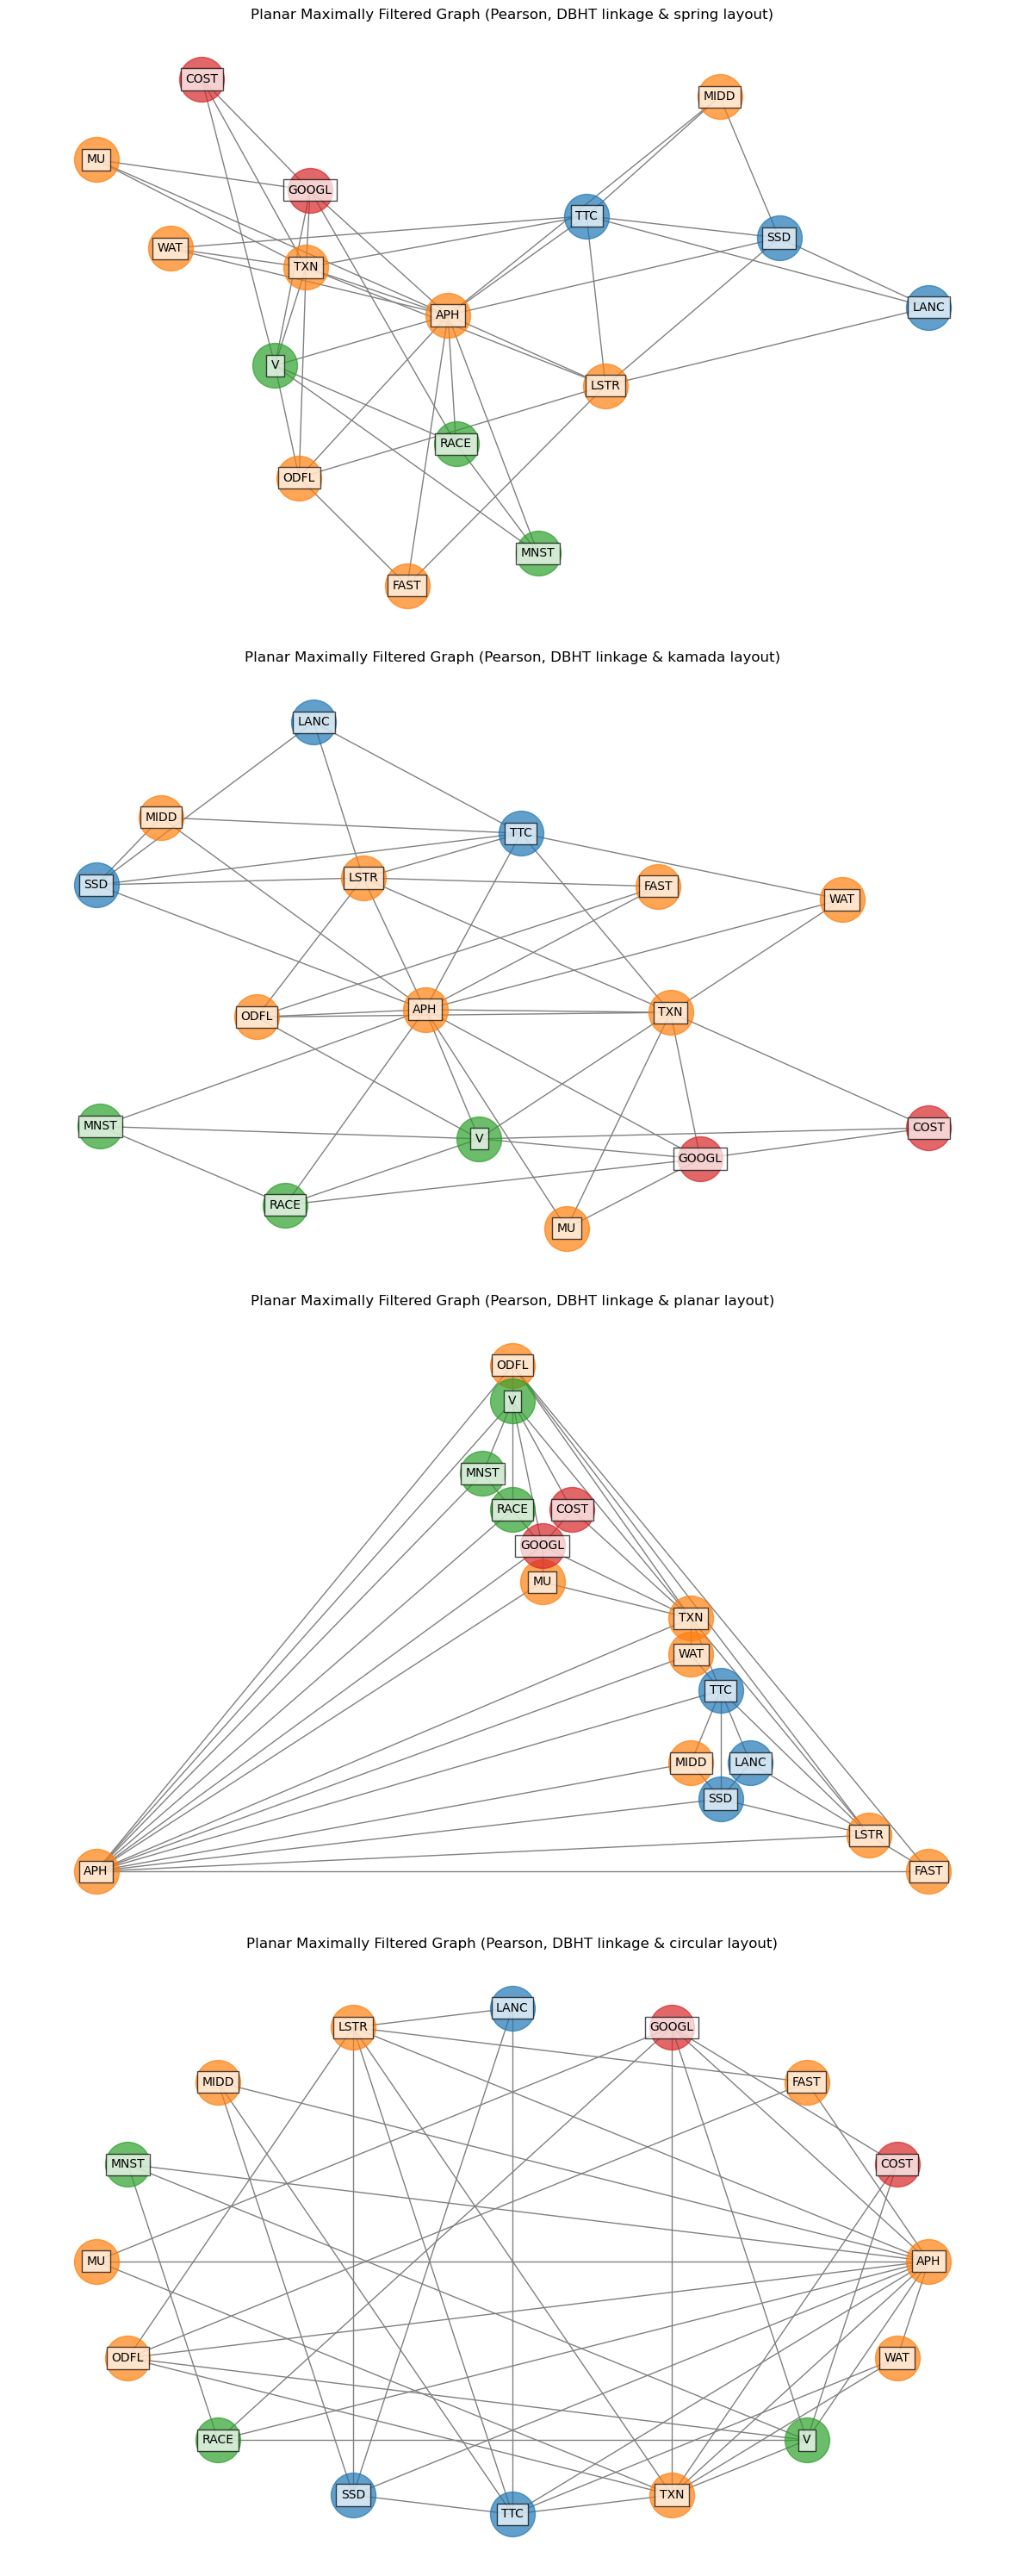

In [84]:
# Comparison of several network layouts

kinds =['spring','kamada','planar','circular']

fig, ax = plt.subplots(len(kinds), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in kinds:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage="DBHT",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind=i,
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()